MODULES

In [16]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Theory on the Gradient Descent algorithm

In [17]:
# Function to be optimized

def f(x, y):
    return x**2 - 4*x + 3 + y**2

#Gradient: The gradient is calculated by taking the partial derivatives with respect to x & 𝑦

def grad_f(x, y):
    df_dx = 2*x - 4
    df_dy = 2*y
    return np.array([df_dx, df_dy])

In [18]:
#Parameters
learning_rate = 0.1  # Tasa de aprendizaje
max_iter = 100  # Número máximo de iteraciones
tolerance = 1e-6  # Tolerancia para la convergencia

In [19]:
#Variables
x, y = 0.0, 0.0  # Valores iniciales para x y y
values = [(x, y)]  # Lista para almacenar el progreso

In [20]:
# Run gradient descent algorithm

for i in range(max_iter):
    gradient = grad_f(x, y)
    x_new = x - learning_rate * gradient[0]
    y_new = y - learning_rate * gradient[1]

    # Verificar la convergencia
    if np.linalg.norm([x_new - x, y_new - y]) < tolerance:
        print(f"Convergencia alcanzada después de {i+1} iteraciones.")
        break

    x, y = x_new, y_new
    values.append((x, y))

print(f"Valor óptimo de x: {x}, y: {y}")
print(f"Valor mínimo de la función: {f(x, y)}")

Convergencia alcanzada después de 59 iteraciones.
Valor óptimo de x: 1.9999952109514347, y: 0.0
Valor mínimo de la función: -0.999999999977065


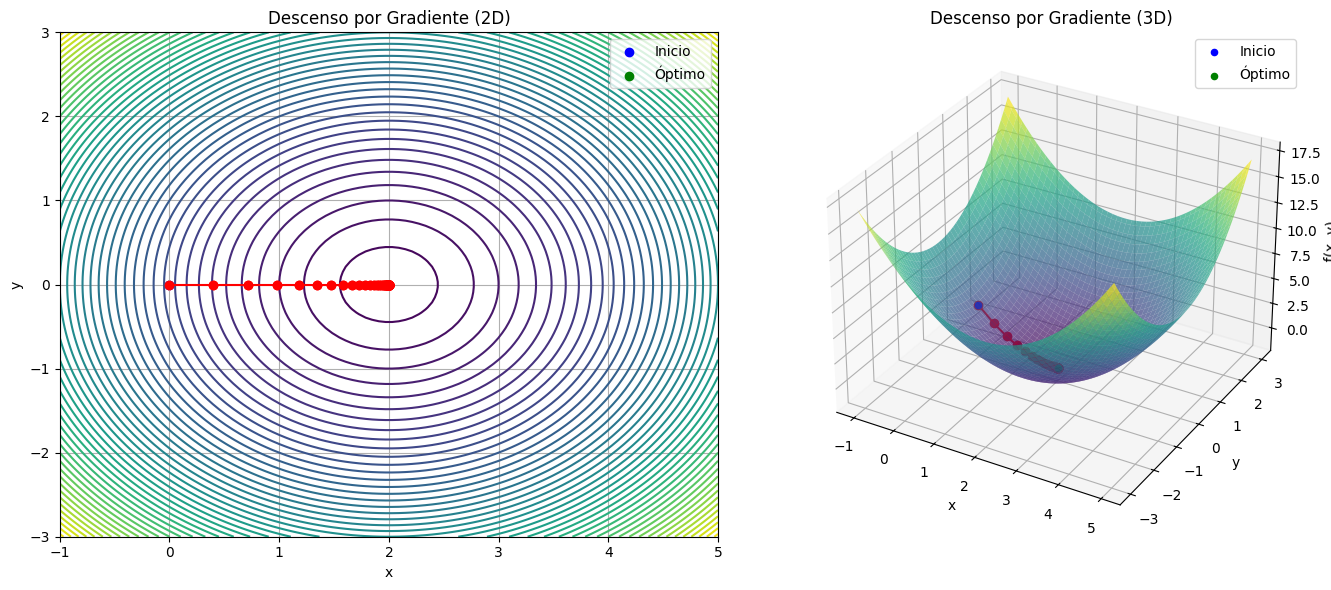

In [27]:
# Plot the results
# Preparar los datos para la gráfica
values = np.array(values)
x_vals = values[:, 0]
y_vals = values[:, 1]

# Crear una malla de puntos para graficar la función de contorno y 3D
x_range = np.linspace(-1, 5, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Crear la figura y los subplots
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Gráfico de contorno 2D
ax1 = fig.add_subplot(1, 2, 1)
ax1.contour(X, Y, Z, levels=50, cmap='viridis')
ax1.plot(x_vals, y_vals, marker='o', color='red')  
ax1.scatter(x_vals, y_vals, color='red') 
ax1.scatter(x_vals[0], y_vals[0], color='blue', label='Inicio')  
ax1.scatter(x_vals[-1], y_vals[-1], color='green', label='Óptimo')  
ax1.set_title('Descenso por Gradiente (2D)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

# Plot the results 3D
# Subplot 2: Gráfico 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax2.plot(x_vals, y_vals, f(x_vals, y_vals), color='red', marker='o')  
ax2.scatter(x_vals[0], y_vals[0], f(x_vals[0], y_vals[0]), color='blue', label='Inicio')  
ax2.scatter(x_vals[-1], y_vals[-1], f(x_vals[-1], y_vals[-1]), color='green', label='Óptimo')  
ax2.set_title('Descenso por Gradiente (3D)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.legend()

#Final Plot
# Mostrar el gráfico
plt.tight_layout()
plt.show()